In [ ]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

### Шаг 1. Загрузка данных

In [ ]:
#прочитаем данные из датасета users_go и запишем их в переменную users
users = pd.read_csv('users_go.csv')

#выведем на экран первые строки датафрейма users и общую информацию о нём
display(users.head())
users.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [ ]:
#прочитаем данные из датасета rides_go и запишем их в переменную rides
rides = pd.read_csv('rides_go.csv')

#выведем на экран первые строки датафрейма rides и общую информацию о нём
display(rides.head())
rides.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Данные столбца `date` имеют неправильный тип.

In [ ]:
#прочитаем данные из датасета subscriptions_go и запишем их в переменную subs
subs = pd.read_csv('subscriptions_go.csv')

#выведем на экран первые строки датафрейма subs и общую информацию о нём
display(subs.head())
subs.info()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Пропущенные значения во всех полученных датафреймах отсутствуют.

### Шаг 2. Предобработка данных

#### Изменение типов данных

Данные столбца `date` датафрейма `rides` имеют тип `object`, тогда как данные о дате следует хранить с типом `datetime`.

In [ ]:
#приведём данные столбца date датафрейма rides к типу date_time
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

#проверим, изменился ли тип данных
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


#### Добавление столбца

In [ ]:
#добавим в датафрейм rides стобец month с номером месяца
rides['month'] = pd.DatetimeIndex(rides['date']).month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


#### Удаление дубликатов

In [ ]:
#удалим повторяющиеся строки из датафрейма users
users = users.drop_duplicates()
users = users.reset_index(drop=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


Количество значений в датафрейме `users` уменьшилось незначительно.

In [ ]:
#удалим повторяющиеся строки из датафрейма rides
rides = rides.drop_duplicates()
rides = rides.reset_index(drop=True)
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


Количество значений в датафрейме `rides` не изменилось, что означает, что повторяющихся строк в нём не было.

Датафрейм `subs` состоит всего из двух строк, повторяющихся значений в нём нет.

**Вывод:**

В ходе предобработки данных:
1. данные столбца `date` датафрейма `rides` были приведены к типу `datetime`,
2. в датафрейм `rides` был добавлен столбец `month` с номером месяца поездки,
3. из датафрейма `users` были удалены посторяющиеся строки.

### Шаг 3. Исследовательский анализ данных

#### Частота встречаемости городов

Text(0, 0.5, 'количество пользователей')

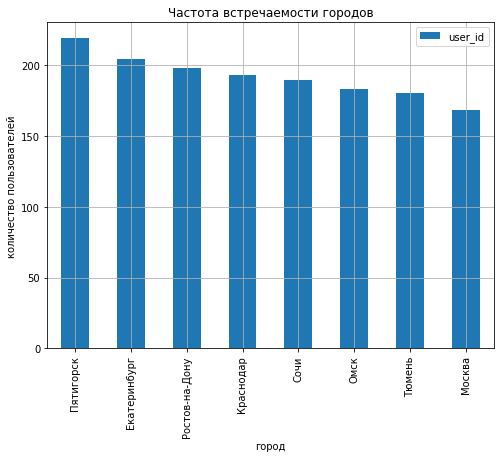

In [ ]:
#построим столбчатую диаграмму частоты встречаемости городов
(users
 .pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)
 .plot(kind='bar', figsize=(8, 6), grid=True))

plt.title('Частота встречаемости городов')
plt.xlabel('город')
plt.ylabel('количество пользователей')

Из диаграммы видно, что наибольшее число пользователей - в **Пятигорске**, наименьшее - в **Москве**.

#### Соотношение пользователей с подпиской и без

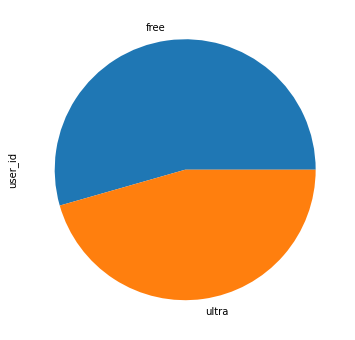

In [ ]:
(users
 .pivot_table(index='subscription_type', values='user_id', aggfunc='count')
 .plot(kind='pie', figsize=(8, 6), grid=True, subplots=True, label=False))

plt.legend('', frameon=False) # код ревьюера

Из диаграммы видно, что больше половины пользователей используют сервис **без подписки**.

#### Возраст пользователей

Text(0, 0.5, 'количество пользователей')

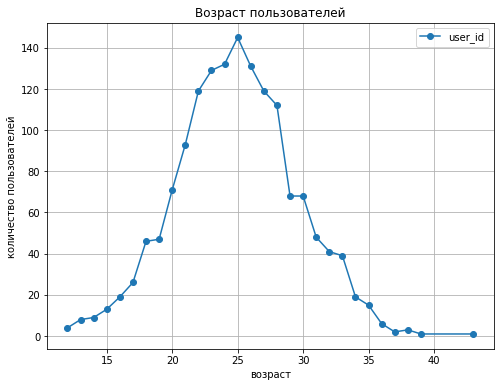

In [ ]:
(users
 .pivot_table(index='age', values='user_id', aggfunc='count')
 .plot(style='o-', figsize=(8, 6), grid=True))

plt.title('Возраст пользователей')
plt.xlabel('возраст')
plt.ylabel('количество пользователей')

Из графика видно, что возраст пользователей *распределён нормально* вокруг среднего значения **25 лет**.

#### Расстояние, преодолеваемое за одну поездку

Text(0, 0.5, 'количество поездок')

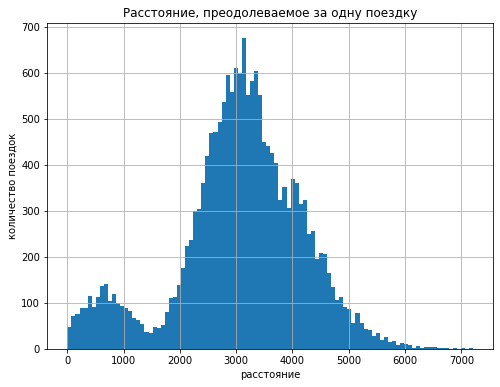

In [ ]:
rides['distance'].hist(bins=100, figsize=(8, 6))

plt.title('Расстояние, преодолеваемое за одну поездку')
plt.xlabel('расстояние')
plt.ylabel('количество поездок')

Из гистограммы видно, что расстояние, преодолеваемое за одну поездку, подчинено *нормальному распределению* вокруг значения **около 3200 метров**.

#### Продолжительность поездок

Text(0, 0.5, 'количество поездок')

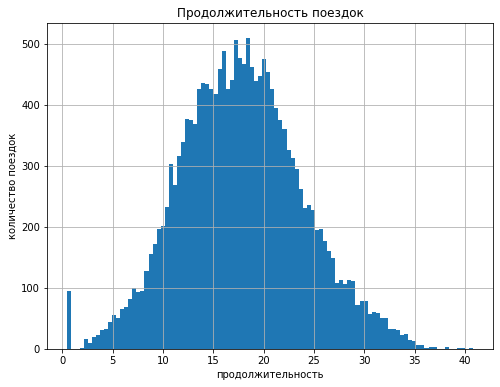

In [ ]:
rides['duration'].hist(bins=100, figsize=(8, 6))

plt.title('Продолжительность поездок')
plt.xlabel('продолжительность')
plt.ylabel('количество поездок')

Из гистограммы видно, что продолжительность поездки подчинена *нормальному распределению* вокруг значения **около 18 минут**.

### Шаг 4. Объединение данных

In [ ]:
#объединим датафреймы users и rides в датафрейм united
united = users.merge(rides, on='user_id', how='inner')

#объединим датафреймы united и subs
united = united.merge(subs, on='subscription_type', how='left')

In [ ]:
#создадим датафрейм sub_free с данными с типом подписки free
sub_free = united.query('subscription_type == "free"')

In [ ]:
#создадим датафрейм sub_ultra с данными с типом подписки ultra
sub_ultra = united.query('subscription_type == "ultra"')

Text(0, 0.5, 'количество поездок')

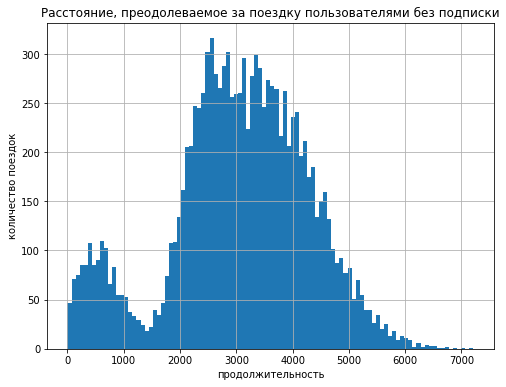

In [ ]:
sub_free['distance'].hist(bins=100, figsize=(8, 6))

plt.title('Расстояние, преодолеваемое за поездку пользователями без подписки')
plt.xlabel('продолжительность')
plt.ylabel('количество поездок')

Text(0, 0.5, 'количество поездок')

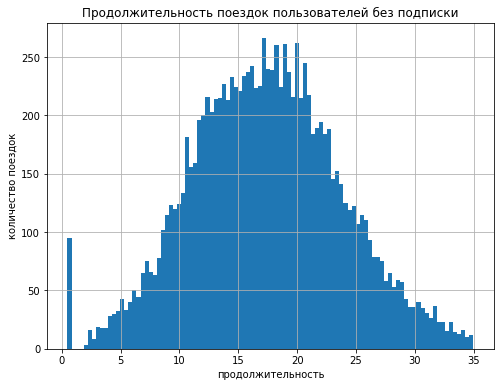

In [ ]:
sub_free['duration'].hist(bins=100, figsize=(8, 6))

plt.title('Продолжительность поездок пользователей без подписки')
plt.xlabel('продолжительность')
plt.ylabel('количество поездок')

Text(0, 0.5, 'количество поездок')

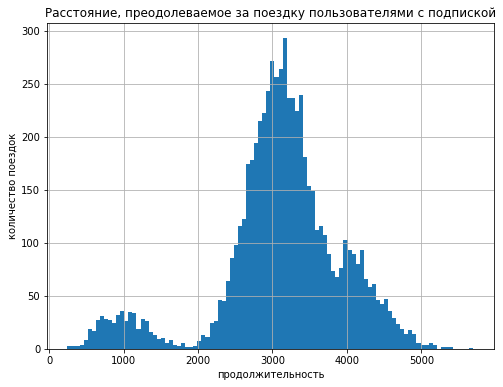

In [ ]:
sub_ultra['distance'].hist(bins=100, figsize=(8, 6))

plt.title('Расстояние, преодолеваемое за поездку пользователями с подпиской')
plt.xlabel('продолжительность')
plt.ylabel('количество поездок')

Text(0, 0.5, 'количество поездок')

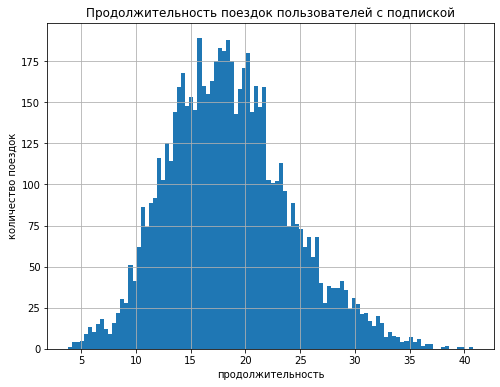

In [ ]:
sub_ultra['duration'].hist(bins=100, figsize=(8, 6))

plt.title('Продолжительность поездок пользователей с подпиской')
plt.xlabel('продолжительность')
plt.ylabel('количество поездок')

**Вывод:**

1. Распределение расстояния, преодолеваемого за поездку пользователями *без подписки*, имеет больший пик значений меньше 1000 метров, чем у пользователей *с подпиской*. Это может означать, что пользователи *без подписки* чаще нанимают самокаты для  коротких поездок, чем пользователи *с подпиской*.

2. Распределение продолжительности поездки пользователей *без подписки* имеет пик около 0 минут, отсутствующий у пользователей *с подпиской*. Этот пик может быть объяснён тем, что пользователи *без подписки* чаще совершают более короткие поездки (см. пункт 1).

### Шаг 5. Подсчёт выручки

In [ ]:
united.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [ ]:
united['duration'] = np.ceil(united['duration'])
united.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [ ]:
#сохраним суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц
#в датафрейм rev_table
rev_table = united.groupby(['user_id', 'month'], as_index=False).agg({'distance': 'sum', 'duration': ['sum', 'count']})
rev_table.columns = ['user_id', 'month', 'distance', 'duration', 'rides']
rev_table.head()

,user_id,month,distance,duration,rides
0,1,1,7027.511294,42.0,2
1,1,4,754.159807,7.0,1
2,1,8,6723.470560,46.0,2
3,1,10,5809.911100,32.0,2
4,1,11,7003.499363,56.0,3


In [ ]:
#сохраним данные из united, необходимые для рассчёта помесячной выручки с каждого пользователя в датафрейм t1
t1 = united[['user_id', 'month', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee']]
t1 = t1.drop_duplicates()
#объединим rev_table и t1
rev_table = rev_table.merge(t1, on=['user_id', 'month'], how='left')
rev_table.head()

,user_id,month,distance,duration,rides,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,42.0,2,ultra,6,0,199
1,1,4,754.159807,7.0,1,ultra,6,0,199
2,1,8,6723.470560,46.0,2,ultra,6,0,199
3,1,10,5809.911100,32.0,2,ultra,6,0,199
4,1,11,7003.499363,56.0,3,ultra,6,0,199


In [ ]:
#добавим в rev_table столбец revenue с рассчитанной выручкой
rev_table['revenue'] = rev_table['rides'] * rev_table['start_ride_price'] + rev_table['duration'] * rev_table['minute_price'] + rev_table['subscription_fee']

rev_table.head()

,user_id,month,distance,duration,rides,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,7027.511294,42.0,2,ultra,6,0,199,451.0
1,1,4,754.159807,7.0,1,ultra,6,0,199,241.0
2,1,8,6723.470560,46.0,2,ultra,6,0,199,475.0
3,1,10,5809.911100,32.0,2,ultra,6,0,199,391.0
4,1,11,7003.499363,56.0,3,ultra,6,0,199,535.0


In [ ]:
#удалим из rev_table лишние столбцы
rev_table.drop(columns=['minute_price', 'start_ride_price', 'subscription_fee'], inplace=True)
rev_table.head()

,user_id,month,distance,duration,rides,subscription_type,revenue
0,1,1,7027.511294,42.0,2,ultra,451.0
1,1,4,754.159807,7.0,1,ultra,241.0
2,1,8,6723.470560,46.0,2,ultra,475.0
3,1,10,5809.911100,32.0,2,ultra,391.0
4,1,11,7003.499363,56.0,3,ultra,535.0


### Шаг 6. Проверка гипотез

#### Гипотеза №1

**Нулевая гипотеза:** средняя продолжительность поездки у пользователей с подпиской и без - равны

**Альтернативная гипотеза:** средняя продолжительность поездки у пользователей с подпиской больше, чем у пользователей без

In [ ]:
sample1 = sub_free['duration']
sample2 = sub_ultra['duration']

print('среднее первой выборки:', sample1.mean())
print('среднее второй выборки:', sample2.mean())

alpha = 0.05

results = st.ttest_ind(sample1, sample2, alternative='less')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Нулевая гипотеза не отвергнута')

среднее первой выборки: 17.39090929866399
среднее второй выборки: 18.54198516280583
p-value: 1.2804098316645618e-34
Нулевая гипотеза отвергнута


Нулевая гипотеза отвергнута, следовательно, **есть основание считать, что средняя продолжительность поездки у пользователей с подпиской больше, чем у пользователей без**.

#### Гипотеза №2

**Нулевая гипотеза:** среднее расстояние поездки у пользователей с подпиской равно 3130 м

**Альтернативная гипотеза:** среднее расстояние поездки у пользователей с подпиской больше 3130 м

In [ ]:
sample = sub_ultra['distance']

print('среднее выборки:', sample.mean())

value = 3130
alpha = 0.05

results = st.ttest_1samp(sample, value, alternative='greater')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Нулевая гипотеза не отвергнута')

среднее выборки: 3115.4453880370247
p-value: 0.9195368847849785
Нулевая гипотеза не отвергнута


Нулевая гипотеза не отвергнута, следовательно, **есть основание считать, что среднее расстояние поездки у пользователей с подпиской не превышает 3130 м**.

#### Гипотеза №3

**Нулевая гипотеза:** средняя выручка от пользователей с подпиской и от пользователей без - равны

**Альтернативная гипотеза:** средняя выручка от пользователей с подпиской больше, чем от пользователей без

In [ ]:
#создадим датафрейм rev_free с данными с типом подписки free
rev_free = rev_table.query('subscription_type == "free"')

#создадим датафрейм rev_ultra с данными с типом подписки ultra
rev_ultra = rev_table.query('subscription_type == "ultra"')

In [ ]:
sample1 = rev_free['revenue']
sample2 = rev_ultra['revenue']

print('среднее первой выборки:', sample1.mean())
print('среднее второй выборки:', sample2.mean())

alpha = 0.05

results = st.ttest_ind(sample1, sample2, alternative='less')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Нулевая гипотеза не отвергнута')

среднее первой выборки: 328.6413651073845
среднее второй выборки: 362.7921906022502
p-value: 1.8850394384715216e-31
Нулевая гипотеза отвергнута


Нулевая гипотеза отвергнута, следовательно, **есть основание считать, что средняя выручка от пользователей с подпиской больше, чем от пользователей без**.

#### Гипотеза №4

*Вопрос:*
Выдвинута гипотеза о том, что из-за обновления серверов мобильного приложения количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления серверов и после него. Какой тест понадобился бы для проверки этой гипотезы?

*Ответ:*
Для проверки последней гипотезы понадобился бы **двухвыборочный t-тест для зависимых выборок** - метод `st.ttest_rel`.

### Вывод

#### Загрузка данных

Для исследования были загружены три датафрейма с основной информацией *о пользователях* (`users`), *о поездках* (`rides`) и *о подписках* (`subs`).

#### Предобработка данных

В ходе исследования была проведена предобработка данных:

1. данные столбца `date` датафрейма `rides` были приведены к типу `datetime`,

2. в датафрейм `rides` был добавлен столбец `month` с номером месяца поездки,

3. из датафрейма `users` были удалены посторяющиеся строки.

#### Исследовательский анализ данных

Был проведён исследовательский анализ данных о *частоте встречаемости городов*, *соотношении пользователей с подпиской и без*, *возрасте пользователей*, *расстоянии, преодолеваемом за одну поездку*, а также о *продолжительности поездок*. Получены следующие выводы:

1. наибольшее число пользователей - в **Пятигорске**, наименьшее - в **Москве**,

2. больше половины пользователей используют сервис **без подписки**,

3. возраст пользователей *распределён нормально* вокруг среднего значения **25 лет**,

4. расстояние, преодолеваемое за одну поездку, подчинено *нормальному распределению* вокруг значения **около 3200 метров**,

5. продолжительность поездки подчинена *нормальному распределению* вокруг значения **около 18 минут**.

#### Объединение данных

Датафреймы `users`, `rides` и `subs` были объединены в общий датафрейм `united`. На основе датафрейма `united` были созданы датафреймы `sub_ultra` и `sub_free` с данными о пользователях с подпиской и без подписки соответственно.

Были построены гистограммы распределений *расстояния, преодолеваемого за поездку,* и *продолжительности поездки* для пользователей с подпиской и без подписки. Обнаружено следующее:

1. Распределение расстояния, преодолеваемого за поездку пользователями *без подписки*, имеет больший пик значений меньше 1000 метров, чем у пользователей *с подпиской*. Это может означать, что пользователи *без подписки* чаще нанимают самокаты для  коротких поездок, чем пользователи *с подпиской*.

2. Распределение продолжительности поездки пользователей *без подписки* имеет пик около 0 минут, отсутствующий у пользователей *с подпиской*. Этот пик может быть объяснён тем, что пользователи *без подписки* чаще совершают более короткие поездки.

#### Подсчёт выручки

Был произведён подсчёт выручки, принесённой каждым пользователем за каждый месяц.

#### Проверка гипотез

В результате статистического анализа данных были проверены три гипотезы, получены следующие выводы:

1. Есть основание считать, что средняя продолжительность поездки **у пользователей с подпиской больше**, чем у пользователей без подписки.

2. Есть основание считать, что среднее расстояние поездки у пользователей с подпиской **не превышает 3130 м**.

3. Есть основание считать, что средняя выручка **от пользователей с подпиской больше**, чем от пользователей без подписки.